### Bistable wilson and cowan like model

from : https://elifesciences.org/articles/22425#fig5

In [256]:
# for fast array manipulation
import numpy as np
# for plotting
import matplotlib.pyplot as plt
# for numerical ODE integration
from scipy.integrate import solve_ivp
# to display plots in-line
%matplotlib inline
plt.style.use('ggplot')

In [257]:
def sigmoid(x, a, thr):
    return 1 / (1 + np.exp(-a * (x - thr)))

def threshold_linear(x,thr,gain):
    thresholded = x-thr
    if thresholded > 0:
        return gain*thresholded
    else:
        return 0 

vthreshold_linear = np.vectorize(threshold_linear)

In [258]:
# Time constant of neural pop in seconds
tau_e = 0.010
tau_i = 0.002
tau_a = 0.5
# Synapse strength
j_ee = 5
j_ei = 1
j_ie = 10
j_ii = 0.5
# Adaptation parameter
beta = 4.5
tau_a = 0.5
# threshold and gains
g_e = 1
g_i = 4
thr_i = 25
thr_e = 3 # to play with
# Input currents
I_e = 6
# I_e-thr_e = 3 which is equivalent to taking I_e = 0 and thr_e = -3 as in the paper
plas_ie = 0.1
plas_ei = 0.3
exc_increase = 0.003
inhib_decay = 0.03
target_inhib = 8
target_exc = 4

In [259]:
# this function returns the right hand side of the Wilson-Cowan equation
# (both, in a 2-vector)
def rate_model(t,y):
    E = y[0]
    E2 = y[1]
    I = y[2]
    A = y[3]
    A2 = y[4]
    J_ie = y[5] 
    J_ei = y[6]
    J_ie2 = y[7] 
    J_e2i = y[8] 

    y1 = (-E + vthreshold_linear(j_ee*E-J_ei*I-A+I_e,thr_e, g_e))/tau_e
    y2 = (-E2 + vthreshold_linear(j_ee*E2-J_e2i*I-A2+I_e,thr_e, g_e))/tau_e
    y3 = (-I + vthreshold_linear(J_ie*E+J_ie2*E2-j_ii*I,thr_i,g_i))/tau_i
    y4 = (-A + beta*E)/tau_a
    y5 = (-A2 + beta*E2)/tau_a
    #Synaptic plasticity
    if J_ie<0:
        y6 = -J_ie
    else : 
        y6 = -(((I-target_inhib)>0)*E*plas_ie)+exc_increase

    if J_ei<0:
        y7 = -J_ei
    else : 
        y7 = (((E-target_exc)>0)*I*plas_ei)-inhib_decay

    if J_ie2<0:
        y8 = -J_ie2
    else : 
        y8 = -(((I-target_inhib)>0)*E2*plas_ie)+exc_increase

    if J_e2i<0:
        y9 = -J_e2i
    else : 
        y9 = (((E2-target_exc)>0)*I*plas_ei)-inhib_decay

    return [y1,y2,y3,y4,y5,y6,y7,y8,y9]


In [260]:
# simulation duration and step size
#time = np.linspace(0, 750, 40000)

# starting point, hopefully inside the basin of attraction of our attractor
E0, E20, I0, A0, A20, J_ie0, J_ei0, J_ie20, J_e2i0  = 0, 0, 0, 0, 1, j_ie, j_ei, j_ie, j_ei  # try changing this

# find the solution with scint.odeint
odesol = solve_ivp(rate_model,[0,100], [E0, E20, I0, A0, A20, J_ie0, J_ei0, J_ie20, J_e2i0])

# separate the two solutions
exc_ts, exc2_ts, inh_ts, a_ts, a2_ts, j_ie_ts, j_ei_ts, j_ie2_ts, j_e2i_ts = odesol.y

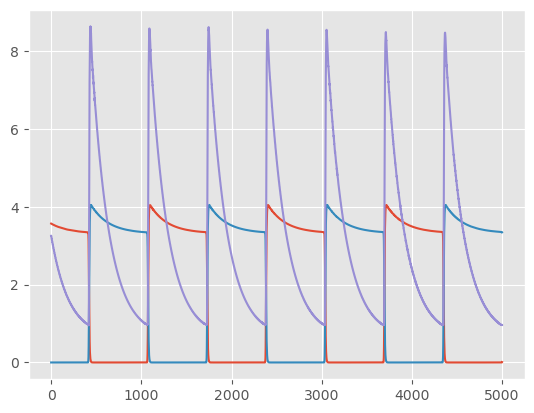

In [261]:
plt.plot(exc_ts[-5000:])
plt.plot(exc2_ts[-5000:])
plt.plot(inh_ts[-5000:])

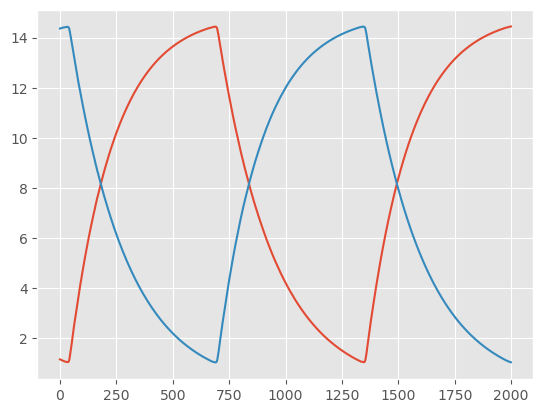

In [262]:
plt.plot(a2_ts[-2000:]);
plt.plot(a_ts[-2000:]);

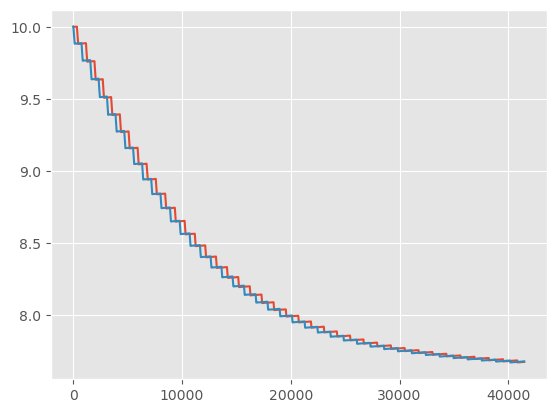

In [263]:
plt.plot(j_ie2_ts);
plt.plot(j_ie_ts);
#plt.plot(inh_ts[-5000:]);

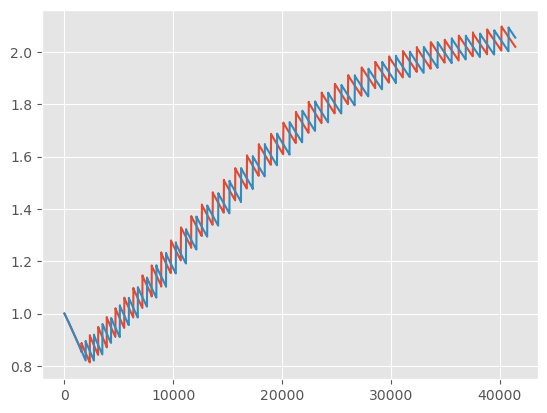

In [264]:
plt.plot(j_ei_ts);
plt.plot(j_e2i_ts);

In [265]:
# # plotting the vector field in the state space (E, I)
# plt.figure(figsize=(10, 10))
# #plt.quiver(x2[:,:,49], x1[:,:,49], X2[:,:,49], X1[:,:,49], pivot='mid', alpha=.5)
# plt.xlim([minval, maxval])
# plt.ylim([minval, maxval])
# plt.xlabel(r'$I$', fontsize=16) # yes, you can use Latex code!
# plt.ylabel(r'$E$', fontsize=16)
# plt.grid()

# # plot the solution in the state space
# plt.plot(inh_timeseries, exc_timeseries, '.-');

# # plot the fixed points we identified
# plt.scatter(fixed_p[1], fixed_p[0], marker='o', c='k', s=50,
#             label="Stationary points")

# # plot the starting point
# plt.scatter(I0, E0, marker='*', c='r', s=300, label="Starting point")
# plt.legend(loc="upper left")

# # plot the solution in time
# plt.figure(figsize=(10.3,3))
# plt.ylabel(r'$E, I$')
# plt.xlabel(r'$t$')
# plt.plot(time, exc_timeseries, '.-', label="excitatory");
# plt.plot(time, inh_timeseries, '.-', label="inhibitory");
# plt.legend();